In [2]:
import matplotlib.pyplot as plt
import dtaidistance
import random
import numpy as np
from scipy.spatial.distance import euclidean
import seaborn as sbn

myseed = 146
random.seed(myseed)
np.random.seed(myseed)

Генерация сигнала

1 тип - гармонический (косинус)

2 тип - модифицированный синус

3 тип - пульс - сигнал

Для выполнения дз надо сгенерировать 21 сигнал: по 7 сигналов каждого типа

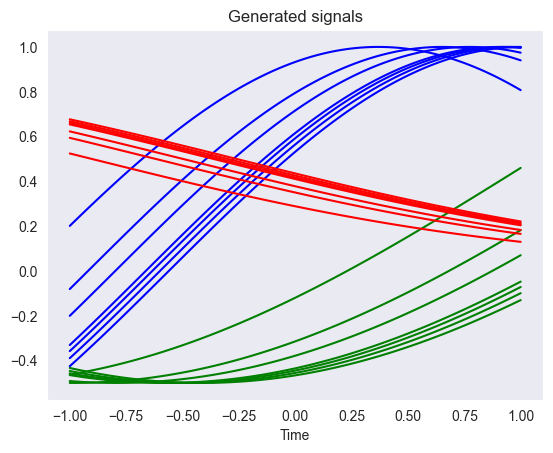

In [3]:
time = np.linspace(-1, 1, 100)

timeseries = {'Time': time}
rnd = np.random.random(size=100)

f0 = 0.2
for i in range(7):
    timeseries["Tc" + str(i)]= -np.cos(np.pi * f0 * time + rnd[i]) + 0.5

for i in range(7):
    timeseries["Ts" + str(i)]= np.sin(time + rnd[i] + 0.3)

for i in range(7):
    timeseries["Tsig" + str(i)]= 1.0 / (1.0 + np.exp(time + rnd[i]))

for i in range(7):
    plt.plot(time, timeseries["Tc" + str(i)], '-g')

for i in range(7):
    plt.plot(time, timeseries["Ts" + str(i)], '-b')

for i in range(7):
    plt.plot(time, timeseries["Tsig" + str(i)], '-r')
            
plt.title(r'Generated signals')
plt.xlabel(r'Time')
plt.grid()

In [4]:
# Посчитаем DTW для двух временных рядов

#для простоты выделяем ряды, которые будем сравнивать
tc1 = timeseries["Tc1"]
tc4 = timeseries["Tc4"]

ts1 = timeseries["Ts1"]
ts2 = timeseries["Ts2"]

tsig1 = timeseries["Tsig1"]
tsig2 = timeseries["Tsig2"]

print(f"Euclidean : ")
print('Tc1 u Tc4 =', euclidean(tc1, tc4))
print('Ts1 u Ts2 =', euclidean(ts1, ts2))
print('Tsig1 u Tsig2 =', euclidean(tsig1, tsig2))
print('Tc1 u Ts2 =', euclidean(tc1, ts2))
print('Ts1 u Tsig2 =', euclidean(ts1, tsig2))
print('Tsig1 u Tc4 =', euclidean(tsig1, tc4), '\n')

print(f"DTW : ")
print('Tc1 u Tc4 =', dtaidistance.dtw.distance(tc1, tc4))
print('Ts1 u Ts2 =', dtaidistance.dtw.distance(ts1, ts2))
print('Tsig1 u Tsig2 =', dtaidistance.dtw.distance(tsig1, tsig2))
print('Tc1 u Ts2 =', dtaidistance.dtw.distance(tc1, ts2))
print('Ts1 u Tsig2 =', dtaidistance.dtw.distance(ts1, tsig2))
print('Tsig1 u Tc4 =', dtaidistance.dtw.distance(tsig1, tc4), '\n')


Euclidean : 
Tc1 u Tc4 = 1.5087286221914897
Ts1 u Ts2 = 2.2726406394203127
Tsig1 u Tsig2 = 0.711615397569151
Tc1 u Ts2 = 7.799972993720965
Ts1 u Tsig2 = 5.259105840656497
Tsig1 u Tc4 = 7.834575948544882 

DTW : 
Tc1 u Tc4 = 0.7123330843297115
Ts1 u Ts2 = 0.7578045139974702
Tsig1 u Tsig2 = 0.21634681487999216
Tc1 u Ts2 = 4.988551683116094
Ts1 u Tsig2 = 5.259105840656497
Tsig1 u Tc4 = 7.834575948544886 


In [10]:
# Посчитаем DTW для двух временных рядов

from scipy.spatial.distance import euclidean

euclidean_dist = np.array([])

for i in range(1, 4):
    x = np.abs(timeseries["Tc" + str(i)])
    y = np.abs(timeseries["Tc" + str(i-1)])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"Расстояние euclidean для объектов cos {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries["Ts" + str(i)])
    y = np.abs(timeseries["Ts" + str(i-1)])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"Расстояние euclidean для объектов sin {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries["Tsig" + str(i)])
    y = np.abs(timeseries["Tsig" + str(i-1)])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"Расстояние euclidean для объектов sig {i} и {7 - i}:", distance)

x = np.abs(timeseries[f"Ts1"])
y = np.abs(timeseries[f"Tsig1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов sin1 и sig1:", distance)

x = np.abs(timeseries[f"Tc1"])
y = np.abs(timeseries[f"Tsig1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов cos1 и sig1:", distance)

x = np.abs(timeseries["Tc1"])
y = np.abs(timeseries["Ts1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов cos1 и sin1:", distance)

Расстояние euclidean для объектов cos 1 и 6: 0.6473163407451511
Расстояние euclidean для объектов cos 2 и 5: 1.3632647909081108
Расстояние euclidean для объектов cos 3 и 4: 0.16659896329862472
Расстояние euclidean для объектов sin 1 и 6: 0.7904559987020083
Расстояние euclidean для объектов sin 2 и 5: 2.026272642446092
Расстояние euclidean для объектов sin 3 и 4: 0.2968367315706435
Расстояние euclidean для объектов sig 1 и 6: 0.2652883794519892
Расстояние euclidean для объектов sig 2 и 5: 0.711615397569151
Расстояние euclidean для объектов sig 3 и 4: 0.08931185979872189
расстояние euclidean для объектов sin1 и sig1: 5.509259410500948
расстояние euclidean для объектов cos1 и sig1: 0.903311426819511
расстояние euclidean для объектов cos1 и sin1: 6.1682340409684375


#### Из среднего разности видно, что метрика dtw точнее показывает разницу между нашими классами.
#### Вывод лучше использовать ее для наших классов.

In [11]:
x = []  #значения
Y = []  # целевая переменная

for v in timeseries:
    if v!= 'Time':
        x.append(timeseries[v])
        c = v[:-1]
        if c == "Tch":
            Y.append(0)
        elif c == "Tc":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)


print(Y)

X_train = []
X_test = []
y_train = []
y_test = []

for i in arr[:-6]:
    X_train.append(x[i])
    y_train.append(Y[i])

for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])


[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [12]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

for i in range(len(X_test)):
    print(f"Accuracy {clf.score(X_test, y_test)}")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")
    print()

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0.]]
Истинный класс для предсказаний 1

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0.]]
Истинный класс для предсказаний 1


In [13]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

for i in range(len(X_test)):
    print(f"Accuracy {clf.score(X_test, y_test)}")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")
    print()

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0.]]
Истинный класс для предсказаний 1

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 1.]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0.]]
Истинный класс для предсказаний 1


In [14]:

import numpy as np 
from pyts.classification import TimeSeriesForest
import matplotlib.pyplot as plt

 
clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)

for i in range(len(X_test)):
    print(f"Accuracy {clf.score(X_test, y_test)}")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")
    print()

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.918 0.082]]
Истинный класс для предсказаний 1

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.072 0.928]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.068 0.932]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.004 0.996]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.088 0.912]]
Истинный класс для предсказаний 2

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.938 0.062]]
Истинный класс для предсказаний 1


### Вывод: модели без проблем распознали классы. Возможно, это связано с тем, что мы сгенерировали слишком простые сигналы, которые легко отличаются друг от друга.
